<a href="https://colab.research.google.com/github/mhdykz/colorQuantization/blob/ipynbFiles/task3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [139]:
image_path = 'peppers.tif'
image = Image.open(image_path)
image_array = np.array(image)

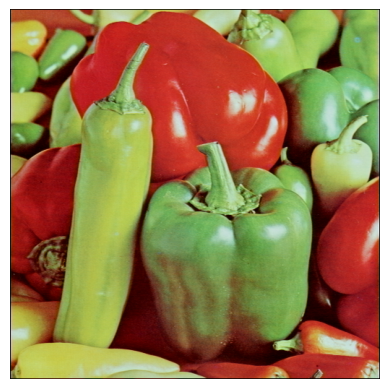

type of array <class 'numpy.ndarray'>
size of array: (262144, 3)
how many D? 2 D


In [140]:
plt.imshow(image_array)
plt.axis('off')
plt.show()

reshaped_image = image_array.reshape(-1, 3)

print("type of array", type(reshaped_image))
print("size of array:", reshaped_image.shape)
print("how many D?", reshaped_image.ndim, "D")

Chosing Random k-point

In [141]:
def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

def findNearestPointDistance(k_points, points):
    k_points_array = np.array(k_points)
    distances = np.linalg.norm(points[:, np.newaxis] - k_points_array, axis=2)
    return distances.min(axis=1)

def makeKRandomPoints(k = int, array = [])->list:
    random_index = np.random.randint(array.shape[0])
    first_point = array[random_index]
    k_points = [first_point]

    for i in range(1, k):  # it's k-1 loop
        weight_distance = findNearestPointDistance(k_points, reshaped_image)

        sumDis = weight_distance.sum()
        weight_distance /= sumDis

        random_pixel_index = np.random.choice(reshaped_image.shape[0], p=weight_distance)
        k_points.append(reshaped_image[random_pixel_index])
        
    return k_points

k_points = makeKRandomPoints(16, reshaped_image)


In [142]:
k_pointsCopy = [x for x in k_points]

In [143]:
def makeCluster(k_points, array):
    # Initialize clusters as a list of empty lists
    clusters = [[] for _ in range(len(k_points))]
    
    # Convert k_points and array to NumPy arrays for efficient computation
    k_points_array = np.array(k_points)
    array = np.array(array)

    # Calculate distances for all points in one go
    for point in array:
        # Calculate distances from the point to all k_points
        distances = np.linalg.norm(k_points_array - point, axis=1)
        min_index = np.argmin(distances)  # Get the index of the closest centroid
        clusters[min_index].append(point.tolist())  # Append the point to the appropriate cluster
    
    return clusters


In [144]:
#print(len(clusters[0]))

In [145]:
def move_k_point():
    clusters = [[[0,1,50],[1,1,1]], [[110,100,60],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]], [[0,0,0],[1,1,1]]]
    for i in range(0, len(clusters)):
        red, blue, green = 0, 0, 0
        for point in clusters[i]:
            red += point[0]
            blue += point[1]
            green += point[2]
        
        red = red // len(clusters[i])
        green = green // len(clusters[i])
        blue = blue // len(clusters[i])
    
        k_points[i] = np.array([red, green, blue], dtype=np.uint8)

In [153]:
class my_K_Mean:
    def __init__(self, k, max_iter = -1) -> None:
        self.k = k
        self.max_iter = max_iter
        self.iterCounter = 0
        
    def fit(self, array):
        while True:
            k_points = makeKRandomPoints(self.k, array)
            clusters = makeCluster(k_points, array)
            move_k_point()
            
            self.iterCounter += 1
            flag = True
            for i in range(0, self.k):
                if k_points[i][0] != k_pointsCopy[i][0]:
                    flag = False
                    break
                if k_points[i][1] != k_pointsCopy[i][1]:
                    flag = False
                    break
                if k_points[i][2] != k_pointsCopy[i][2]:
                    flag = False
                    break
                
            if flag == True or (self.iterCounter >= self.max_iter and self.max_iter!=-1) :
                return k_points
            
k_mean = my_K_Mean(16,100)
k_points = k_mean.fit(reshaped_image)

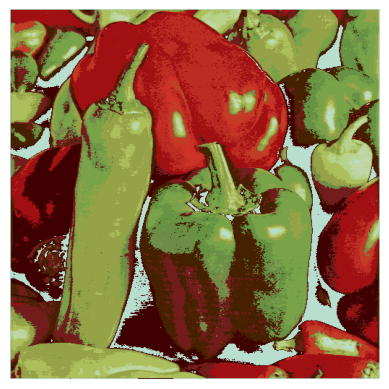

(512, 512, 3)

In [154]:
def replace_colors(image, k_points):
    # Reshape the image to a 2D array of pixels
    pixel_array = image.reshape(-1, 3)  # Shape: (262144, 3) for a 512x512 image

    # Convert k_points to a NumPy array for efficient computation
    k_points_array = np.array(k_points)

    # Find the closest k_point for each pixel
    distances = np.linalg.norm(pixel_array[:, np.newaxis] - k_points_array, axis=2)
    closest_indices = np.argmin(distances, axis=1)

    # Replace each pixel with the closest k_point color
    quantized_pixels = k_points_array[closest_indices]

    # Reshape back to the original image shape
    quantized_image = quantized_pixels.reshape(image.shape)

    return quantized_image
a = replace_colors(image_array, k_points)
plt.imshow(a)
plt.axis('off')
plt.show()
a.shape